In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
import pandas as pd
data=pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# Regression problem
print('shape{}'.format(data.shape),'\n')
print('data_type:\n{}'.format(data.dtypes))

shape(301, 9) 

data_type:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


In [4]:
print('car_name_unique:{}'.format(data['Car_Name'].unique()),'\n')
print('fuel_type_unique:{}'.format(data['Fuel_Type'].unique()),'\n')
print('seller_type_unique:{}'.format(data['Seller_Type'].unique()),'\n')
print('transmission_unique:{}'.format(data['Transmission'].unique()),'\n')
print('owner:{}'.format(data['Owner'].unique()),'\n')

car_name_unique:['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 2

In [5]:
### cheaking missing values
print(data.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
cols=list(data.columns)
print(cols)

['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


In [8]:
features=cols[1:]
final_data=data[features]
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df=pd.get_dummies(final_data,drop_first=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [10]:
## correlations
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,0.064315,-0.059959,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,0.064315,0.552339,0.473306,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.059959,-0.540571,-0.465244,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.039896,-0.550724,-0.512030,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,0.000394,-0.367128,-0.348715,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000


<Figure size 432x288 with 0 Axes>

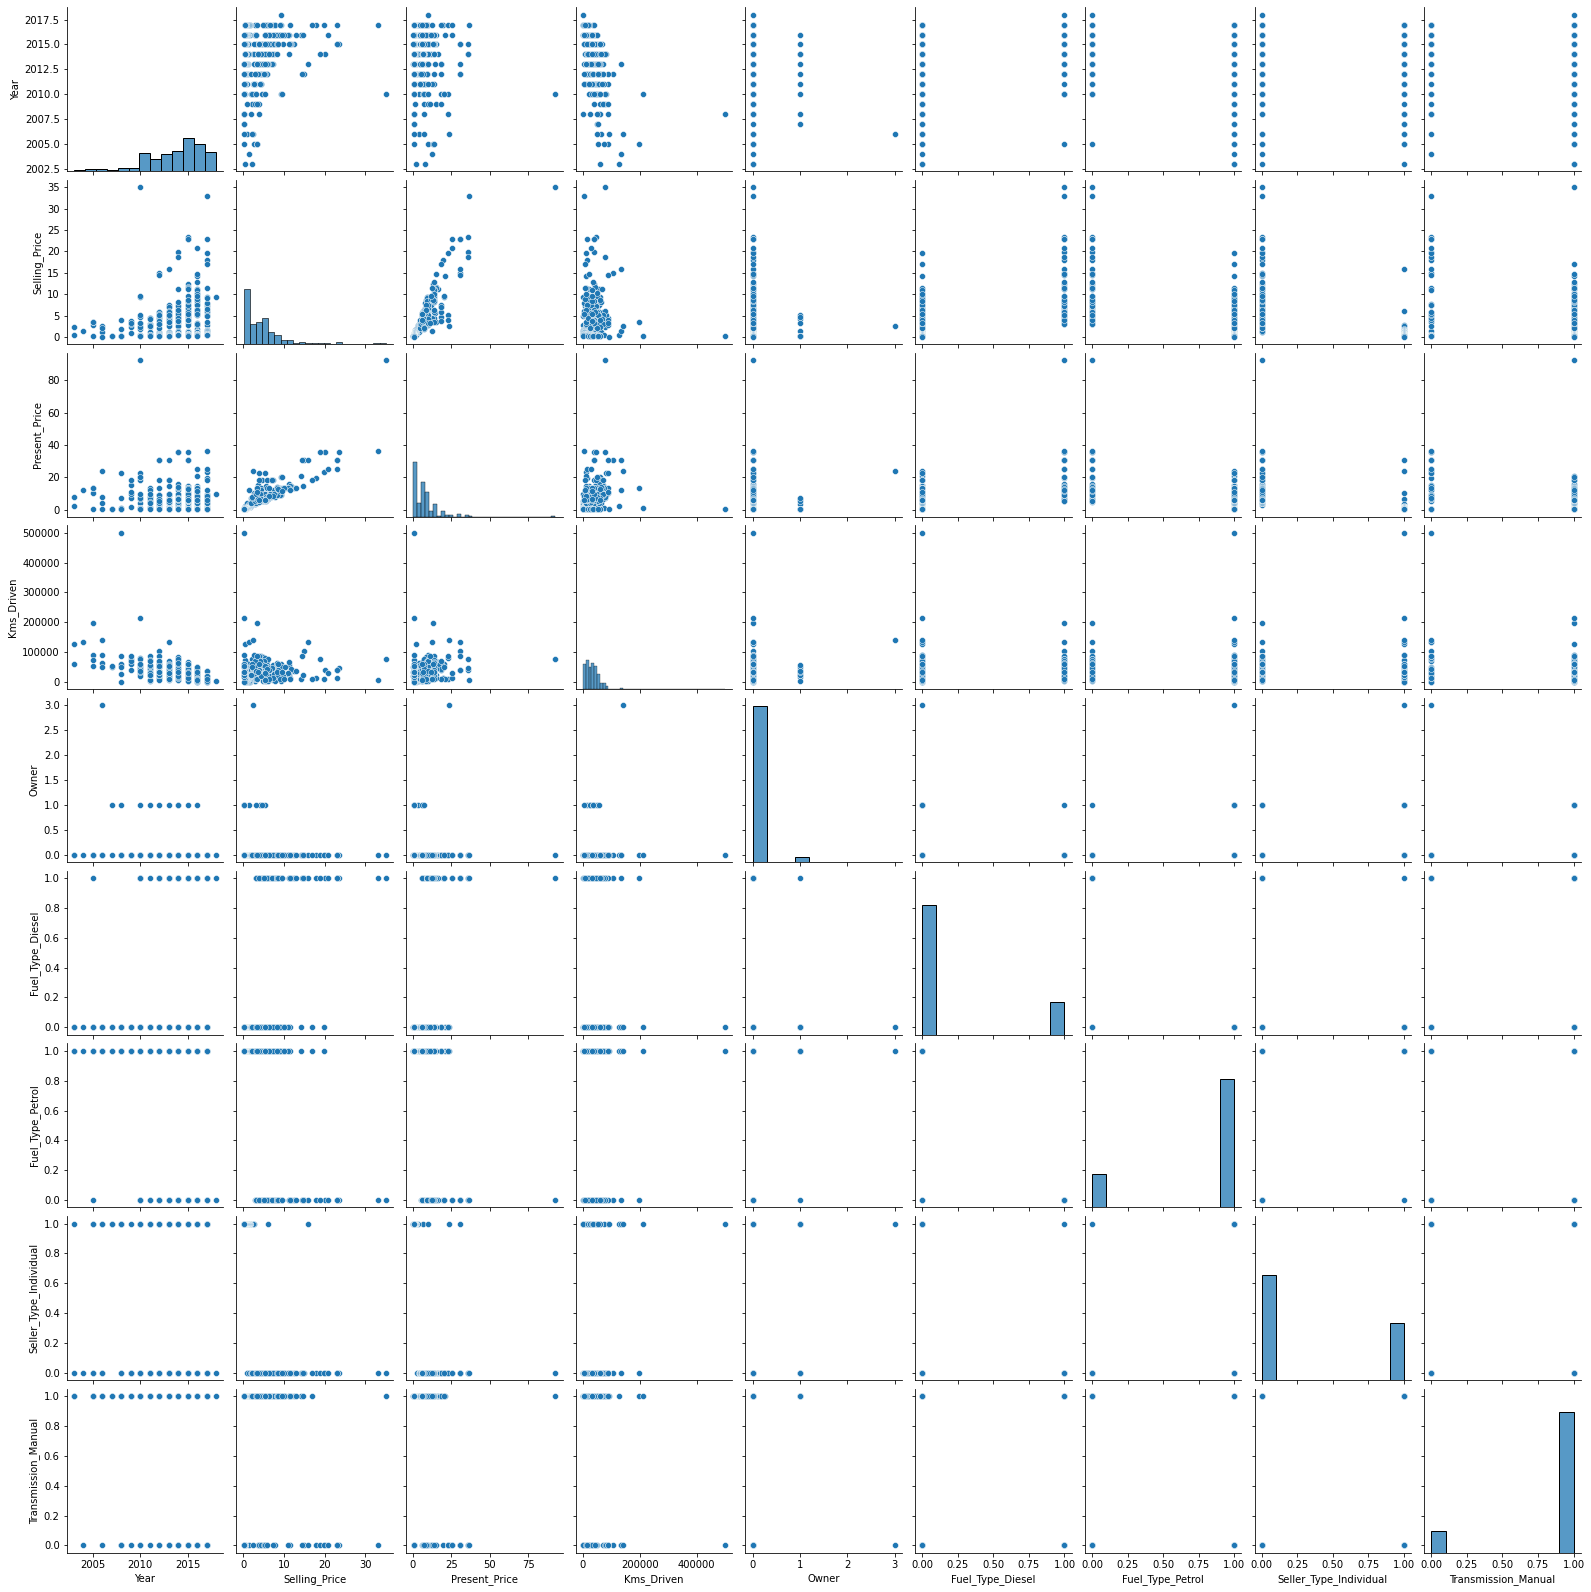

In [11]:
## pairplot
plt.figure()
sns.pairplot(df)

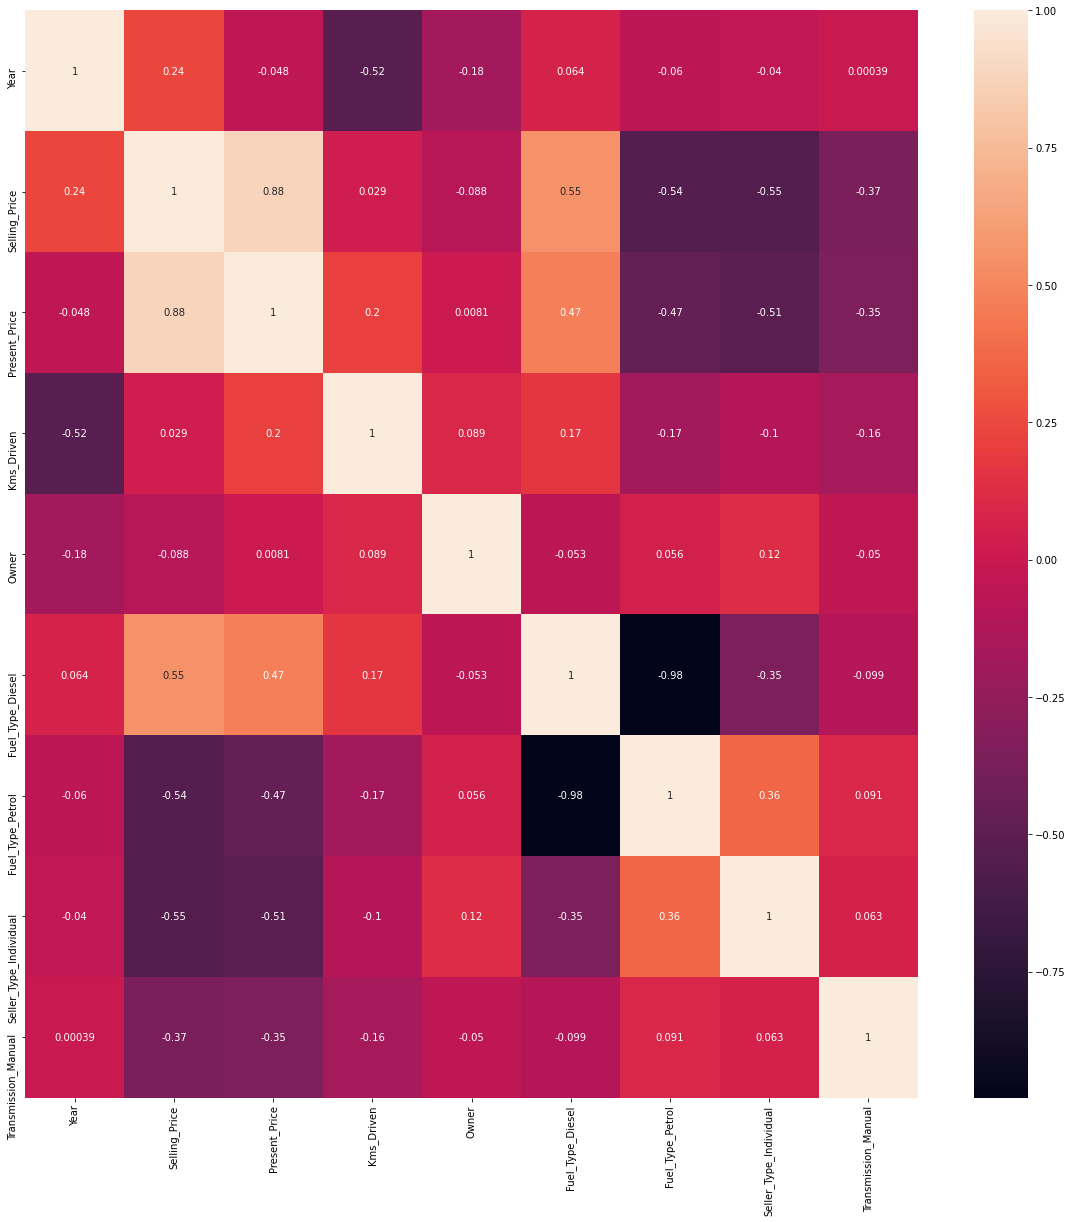

In [12]:
plt.figure(figsize=(20,20))
corrmat=df.corr()
top_corr_features=corrmat.index
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [13]:
final_df=df.copy()
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [14]:
X=final_df.drop('Selling_Price',axis=1)
y=final_df.iloc[:,1]

In [15]:
### important features
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [16]:
print(model.feature_importances_)

[7.75680304e-02 3.91676030e-01 4.20675784e-02 3.77454261e-04
 2.28084285e-01 1.28488934e-02 1.18049648e-01 1.29328080e-01]


Text(0.5, 1.0, 'features_importances')

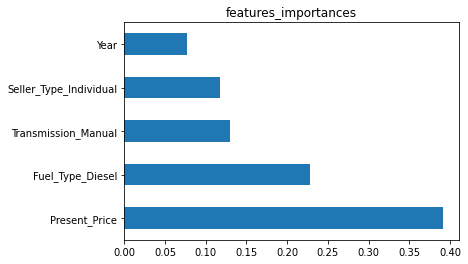

In [17]:
plt.figure()
imp_feat=pd.Series(model.feature_importances_,index=X.columns)
imp_feat.nlargest(5).plot(kind='barh')
plt.title('features_importances')

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=21)

In [19]:
#### learning algorithm
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=100,max_depth=5,random_state=0)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [20]:
y_pred=rf_reg.predict(X_test)
y_pred

array([ 5.23452052,  3.07878934,  4.3150852 ,  4.67426051,  2.76575564,
        0.55825874,  4.85827761,  0.37856375,  7.30844641, 10.02451   ,
        7.24409421,  9.88607957,  0.58345743,  0.56734013,  5.55479017,
        8.80907555,  4.74982854,  0.54124025,  5.50655406,  1.08938816,
        0.36042121,  2.98613761, 15.58193095, 10.01208072,  3.4113874 ,
        0.36219204,  4.75395683,  7.30633735,  0.31599116, 15.14418842,
        4.89444193,  0.60040496,  0.31599116,  0.35109705,  0.86233045,
        1.13231895,  2.18408502,  0.32270629,  3.60998986,  3.06609663,
       21.35529167,  2.66529941,  0.52903153,  7.34787671,  6.90341498,
        1.22016322,  3.36135542,  2.87445479,  5.64112212,  0.33019161,
        4.72344925,  6.63467827,  1.75126363,  0.31943709,  9.33620792,
        6.77887073,  0.31599116,  4.92428522,  4.53904114,  4.77771678,
        7.66512909,  1.11787653,  7.37137671,  5.55928162,  1.51863371,
        5.49194401,  0.37555129,  0.57176361,  2.84756027,  5.55

<AxesSubplot:xlabel='Selling_Price'>

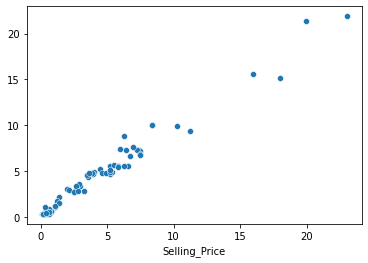

In [21]:
plt.figure()
sns.scatterplot(y_test,y_pred)

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

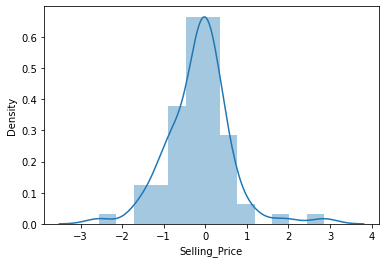

In [22]:
plt.figure()
sns.distplot(y_test-y_pred)